# Guided Capstone Project Report



## Problem Statement
Big Mountain Resort is a ski resort whose pricing strategy so far has been to charge a premium above the average price in their market segment. By using this pricing strategy, they don’t know the relative importance of each of their facilities and cannot make good investment decisions. The company wants guidance on whether they could increase profit by raising the price for existing facilities, or by saving costs on facilities that are less relevant for pricing.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

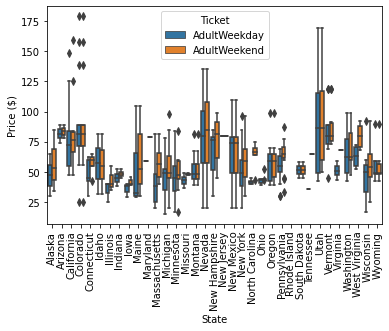

In [8]:
ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')
ticket_prices = pd.melt(ski_data[["state", "AdultWeekday", "AdultWeekend"]], id_vars=["state"], value_vars=["AdultWeekday", "AdultWeekend"],
value_name="Price", var_name='Ticket')
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

## Analysis
### Data Wrangling
To shed light to these questions a dataset of all (?) US ski resorts obtained from X (?) is analysed. The data includes information for 330 resorts in 38 states and 27 features, including weekend and weekday adult ticket prices. After dropping missing values for both prices the dataset consisted of 277 rows. Two implausible values of features were updated with data from the respective resorts’ website an entire feature had to be dropped due to too many missing values and too little variation. Weekend price had less missing values compared to the weekday price, and was therefore used as the target feature.
### Exploratory Data Analysis
The analysis started out in exploring the total number of resorts and skiable area by state to see whether there is a relationship with ticket price. State should not be the main predictor of price, given that the data are for resorts in the same market segment. The majority of prices across states lies within a broad range of 25 to 100 USD, as confirmed by looking at the boxplot below.
Resorts in different states could be fundamentally different in terms of their features. Running principal component analysis indicates no clear relationship between the state-level skiing features and ticket price. This suggests that state does not need to be considered in the model. Looking at the correlation heat map, the resort-level features with the highest positive correlations with prices are: total no. of fast quads, total runs, area with snowmakers, total chairs, and resort night skiing capacities as share of state night skiing area. 
### Modelling
To model the price, a random forest model was preferred over the linear regression model based on its performance in predicting the price (mean squared error) in a 5 fold cross-validation. The optimal number of features to be included in the model is 8. Both models coincide in revealing the four main features being fastQuads,Runs, Snow Making_ac, and vertical_drop. Testing the size of the training data set shows that optimal performance is achieved with around 40 observations and no more data needs to be collected. The modeling results reveal a ticket price of up to $95.87 to be adequate given Big Mountain’s facilities. 
### Scenario Analysis
Price response for 4 scenarios were then analyzed: (1) Permanently closing down up to 10 of the least used runs, (2) increase the vertical drop by adding a run to a point 150 feet lower down but requiring the installation of an additional chair lift to bring skiers back up, without additional snow making coverage, (3) Same as number 2, but adding 2 acres of snow making cover, (4) increase the longest run by 0.2 miles to boast 3.5 miles length, requiring an additional snow making coverage of 4 acres. Modeling results suggest that scenario 1 would lower revenues by between 710,145 and 3.17m USD. Improvements of some features as in scenarios 2 and 3 could add between 15 and 17m dollars in revenues. Scenario 4 does not affect price.


## Summary and Conclusion

Currently, Big Mountain is charging 81 USD per adult weekend ticket. The modeling results based on the characteristics of other resorts suggest a price increase up to 95.87 USD would be justified. After accounting for the additional operating cost of the new chair lift, annual revenues would increase by 24.5m. Data on operating cost of all facilities as well as investment costs for newly installing features would be needed for a meaningful scenario analysis in order to predict changes in profit. Also, it is unclear how the number of visitors which is assumed to be constant would change if facilities were added or closed down. Without this info, the best recommendation would be to raise the price to the predicted value without further changes.